# Data Wrangling

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta

The data includes a table of 12,000 users who signed up for the product in the last two years (users) and a table of usage summary, with a row for each day that a user logged in to the product (engagement).

Defining an "adopted user" as a user who has logged into the product on three separate days in at least one seven-day period, identify which factors predict future user adoption.

In [39]:
#import and preview data
users = pd.read_csv('takehome_users.csv', encoding='latin-1', parse_dates=True)

users.head(20)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0


In [40]:
engagement = pd.read_csv('takehome_user_engagement.csv', parse_dates=True)

engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [41]:
print(users.info())
print(engagement.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Co

Since an "adopted" user is one who has logged in at least 3 times in one 7-day period, we need to group logins (engagements) by user to see how many users meet this criteria.

In [42]:
print(engagement['user_id'].nunique()) #number of individual users who logged in
print(len(engagement)) #number of total logins

8823
207917


In [43]:
#convert time_stamp from object to datetime
engagement['time_stamp'] = pd.to_datetime(engagement['time_stamp'], format='%Y-%m-%d %H:%M:%S')

In [44]:
#find users who have met our criteria of logging in 3 days out of 7 days
def adoption(data, logins=3, days=7):
    data['date'] = data['time_stamp'].dt.date
    data = data.drop_duplicates(subset='date').sort_values('date') #drop duplicate days (user has to log in on 3 days, not just 3 times)

    #define time period between logins
    days_btwn = data['date'].diff(periods=logins - 1) #2 periods in between 3 days
    return any(days_btwn <= timedelta(days=days))

#apply function to our data
adopted_users = engagement.groupby('user_id').apply(adoption)

In [45]:
sum(adopted_users)

1656

Out of the total 8823 users who logged in to the service 1656 were "adopted" according to our criteria.

In [46]:
adopted_users.head()

user_id
1    False
2     True
3    False
4    False
5    False
dtype: bool

In [47]:
adopted_users_df = pd.DataFrame(adopted_users).reset_index()
adopted_users_df = adopted_users_df.rename(columns={0:"adopted"})
adopted_users_df.head()

,user_id,adopted
0,1,False
1,2,True
2,3,False
3,4,False
4,5,False


We now have a dataframe of users' IDs and whether or not they were adopted.

In [48]:
#cleaning up the original users dataframe to remove columns that won't be useful for analysis
users = users.drop(columns=['email', 'name', 'invited_by_user_id'], axis=1)
users.head()

,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id
0,1,2014-04-22 03:53:30,GUEST_INVITE,1.398139e+09,1,0,11
1,2,2013-11-15 03:45:04,ORG_INVITE,1.396238e+09,0,0,1
2,3,2013-03-19 23:14:52,ORG_INVITE,1.363735e+09,0,0,94
3,4,2013-05-21 08:09:28,GUEST_INVITE,1.369210e+09,0,0,1
4,5,2013-01-17 10:14:20,GUEST_INVITE,1.358850e+09,0,0,193


In [49]:
#the time features (creation_time and last_session_creation_time) need to be converted to datetime
users['creation_time'] = pd.to_datetime(users['creation_time'], format='%Y-%m-%d %H:%M:%S')
users['last_session_creation_time'] = pd.to_datetime(users['last_session_creation_time'], unit='s')

#new feature to define the length of time an account has existed
#time between account creation and most recent account creation (assuming that is approximately the time the data was downloaded)
users['elapsed_account_time'] = (max(users['creation_time']) - users['creation_time']).dt.days

#new feature to define the length of time a user has been active on their account 
#time between account creation and most recent use measured in days
users['elapsed_usage_time'] = (users['last_session_creation_time'] - users['creation_time']).dt.days


users.head(20)

,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,elapsed_account_time,elapsed_usage_time
0,1,2014-04-22 03:53:30,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,38,0.0
1,2,2013-11-15 03:45:04,ORG_INVITE,2014-03-31 03:45:04,0,0,1,196,136.0
2,3,2013-03-19 23:14:52,ORG_INVITE,2013-03-19 23:14:52,0,0,94,437,0.0
3,4,2013-05-21 08:09:28,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,374,1.0
4,5,2013-01-17 10:14:20,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,498,5.0
5,6,2013-12-17 03:37:06,GUEST_INVITE,2013-12-19 03:37:06,0,0,197,164,2.0
6,7,2012-12-16 13:24:32,SIGNUP,2012-12-20 13:24:32,0,1,37,530,4.0
7,8,2013-07-31 05:34:02,PERSONAL_PROJECTS,NaT,1,1,74,303,NaN
8,9,2013-11-05 04:04:24,PERSONAL_PROJECTS,NaT,0,0,302,206,NaN
9,10,2013-01-16 22:08:03,ORG_INVITE,2014-06-03 22:08:03,1,1,318,499,503.0


In [50]:
#now that the new features exist, we don't need to keep the original time features
users = users.drop(columns=['creation_time','last_session_creation_time'], axis=1)
users.head()

,object_id,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,elapsed_account_time,elapsed_usage_time
0,1,GUEST_INVITE,1,0,11,38,0.0
1,2,ORG_INVITE,0,0,1,196,136.0
2,3,ORG_INVITE,0,0,94,437,0.0
3,4,GUEST_INVITE,0,0,1,374,1.0
4,5,GUEST_INVITE,0,0,193,498,5.0


Next step is to merge the two dataframes together (inner join) based on the user ID numbers. Then I will drop users whose elapsed usage time is NaN - this is happening because those users' original 'last_creation_time' was NaT. I don't know if their information is simply missing or exactly what happened with this data, but either way I cannot impute the information accurately so I will just remove those rows entirely.

In [51]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_source             12000 non-null  object 
 2   opted_in_to_mailing_list    12000 non-null  int64  
 3   enabled_for_marketing_drip  12000 non-null  int64  
 4   org_id                      12000 non-null  int64  
 5   elapsed_account_time        12000 non-null  int64  
 6   elapsed_usage_time          8823 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 656.4+ KB


In [52]:
#make the indices match on the two dataframes to be merged
users = users.set_index('object_id')
users.index.name = 'user_id'

users.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,elapsed_account_time,elapsed_usage_time
user_id,,,,,,
1,GUEST_INVITE,1,0,11,38,0.0
2,ORG_INVITE,0,0,1,196,136.0
3,ORG_INVITE,0,0,94,437,0.0
4,GUEST_INVITE,0,0,1,374,1.0
5,GUEST_INVITE,0,0,193,498,5.0


In [53]:
adopted_users_df = adopted_users_df.set_index('user_id')
adopted_users_df.head()

,adopted
user_id,
1,False
2,True
3,False
4,False
5,False


In [54]:
#inner join the two dataframes
user_engagement = pd.concat([users, adopted_users_df['adopted']], axis=1, join='inner')

user_engagement.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,elapsed_account_time,elapsed_usage_time,adopted
user_id,,,,,,,
1,GUEST_INVITE,1,0,11,38,0.0,False
2,ORG_INVITE,0,0,1,196,136.0,True
3,ORG_INVITE,0,0,94,437,0.0,False
4,GUEST_INVITE,0,0,1,374,1.0,False
5,GUEST_INVITE,0,0,193,498,5.0,False


In [55]:
#convert the True/False boolean for "adopted" to 1/0
user_engagement['adopted'] = user_engagement['adopted'].astype(int)

user_engagement.head(10)

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,elapsed_account_time,elapsed_usage_time,adopted
user_id,,,,,,,
1,GUEST_INVITE,1,0,11,38,0.0,0
2,ORG_INVITE,0,0,1,196,136.0,1
3,ORG_INVITE,0,0,94,437,0.0,0
4,GUEST_INVITE,0,0,1,374,1.0,0
5,GUEST_INVITE,0,0,193,498,5.0,0
6,GUEST_INVITE,0,0,197,164,2.0,0
7,SIGNUP,0,1,37,530,4.0,0
10,ORG_INVITE,1,1,318,499,503.0,1
11,SIGNUP,0,0,69,155,1.0,0


In [56]:
#convert "creation_source" to categorical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

user_engagement['creation_source'] = le.fit_transform(user_engagement['creation_source'])

In [57]:
#convert "org_id" to categorical
user_engagement['org_id'] = le.fit_transform(user_engagement['org_id'])

In [58]:
user_engagement.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,elapsed_account_time,elapsed_usage_time,adopted
user_id,,,,,,,
1,0,1,0,11,38,0.0,0
2,1,0,0,1,196,136.0,1
3,1,0,0,94,437,0.0,0
4,0,0,0,1,374,1.0,0
5,0,0,0,193,498,5.0,0


In [59]:
#drop all rows with null values
user_engagement.dropna()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,elapsed_account_time,elapsed_usage_time,adopted
user_id,,,,,,,
1,0,1,0,11,38,0.0,0
2,1,0,0,1,196,136.0,1
3,1,0,0,94,437,0.0,0
4,0,0,0,1,374,1.0,0
5,0,0,0,193,498,5.0,0
...,...,...,...,...,...,...,...
11996,1,0,0,89,266,0.0,0
11997,4,0,0,200,505,5.0,0
11998,0,1,1,83,33,0.0,0


Now we have clean data for each user with relevant features in numerical data types, ready for predictive modeling.

# Modeling

A random forest model will be good for this problem, as it's a mix of categorical and numerical variables with a relatively small feature/sample size.

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = user_engagement.drop('adopted', axis=1)
y = user_engagement['adopted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(class_weight='balanced_subsample')

In [63]:
#fit and test the model
rf_model = rf.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9637325273894976


This looks really good! Let's check some other metrics to confirm.

In [66]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[2105   31]
 [  65  446]]


In [67]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2136
           1       0.94      0.87      0.90       511

    accuracy                           0.96      2647
   macro avg       0.95      0.93      0.94      2647
weighted avg       0.96      0.96      0.96      2647



In [76]:
#initialize empty dataframe for feature importances, populate with results from model
features = pd.DataFrame()
features['val'] = rf.feature_importances_
idx = user_engagement.drop(columns=['adopted'])
features = features.set_index(idx.columns)

features

,val
creation_source,0.013514
opted_in_to_mailing_list,0.003751
enabled_for_marketing_drip,0.003453
org_id,0.049468
elapsed_account_time,0.073118
elapsed_usage_time,0.856697


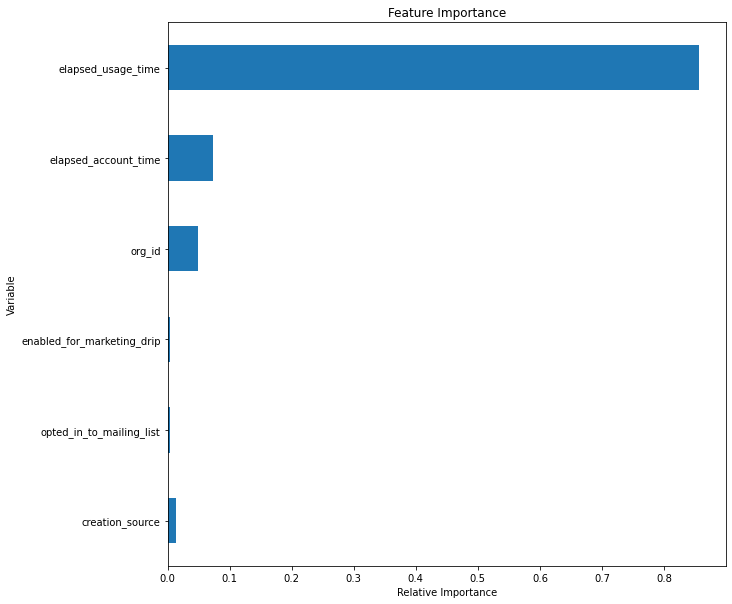

In [79]:
#visualize this result
plt.figure(figsize=(10,10))
(features['val']).plot(kind='barh', x=features.index)
plt.ylabel('Variable')
plt.xlabel('Relative Importance')
plt.title('Feature Importance')
plt.show()

From this result, it's clear that the strongest indicator of a user who will be adopted is their usage history. None of the other variables come anywhere near the relative importance of the "elapsed_usage_time" variable, which is an indicator of how many days have passed between a user's account being created and their most recent login - basically, a record of how long the user has been active in the service.